In [1]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# turn 278k_song_labelled.csv into a dataframe
df = pd.read_csv('278k_song_labelled.csv')
df = df.dropna()
df = df.drop_duplicates()
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [3]:
# change labels to it's respective mood
# 0 = sad, 1 = happy, 2 = energetic, 3 = calm
df['labels'] = df['labels'].replace(0, 'sad')
df['labels'] = df['labels'].replace(1, 'happy')
df['labels'] = df['labels'].replace(2, 'energetic')
df['labels'] = df['labels'].replace(3, 'calm')

df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,energetic
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,happy
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,happy
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,sad
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,happy


In [5]:
# create a KNN model using the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df[['danceability', 'energy', 'loudness',  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]]
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)



In [6]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
type(X_test)
X_train[0]

array([-0.07767266, -0.27417528,  0.01839808, -0.50709442,  0.79533554,
        0.66646859,  1.19248064,  0.69977373,  1.2493616 ])

In [7]:
# create the model
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


In [8]:
# find the best number of neighbors
# scores = []
# for i in range(1, 20):
#     model = KNeighborsClassifier(n_neighbors=i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     scores.append(accuracy)

# plt.plot(range(1, 20), scores)
# plt.xlabel('Number of neighbors')
# plt.ylabel('Accuracy')
# plt.show()

In [9]:
# plot the scores with ticks for each number of neighbors
# plt.plot(range(1, 20), scores)
# plt.xticks(range(1, 20))
# plt.xlabel('Number of neighbors')
# plt.ylabel('Accuracy')
# plt.show()


In [10]:
# the best number of neighbors to use is 11

model = KNeighborsClassifier(n_neighbors=11)
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# change X to dataframe
X = pd.DataFrame(X, columns=['danceability', 'energy', 'loudness',  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ])
X.head()
model.fit(X, y)



KNeighborsClassifier(n_neighbors=11)

In [11]:
# predict using 100 values from X
y_pred = model.predict(X[:100])
y_pred

array(['happy', 'happy', 'energetic', 'sad', 'happy', 'happy', 'happy',
       'happy', 'sad', 'sad', 'energetic', 'happy', 'happy', 'happy',
       'happy', 'happy', 'energetic', 'energetic', 'happy', 'happy',
       'sad', 'happy', 'happy', 'energetic', 'happy', 'happy',
       'energetic', 'happy', 'happy', 'energetic', 'happy', 'happy',
       'sad', 'happy', 'happy', 'sad', 'happy', 'happy', 'happy', 'happy',
       'energetic', 'happy', 'happy', 'energetic', 'happy', 'happy',
       'happy', 'sad', 'happy', 'happy', 'happy', 'energetic', 'happy',
       'happy', 'happy', 'sad', 'happy', 'happy', 'happy', 'energetic',
       'energetic', 'energetic', 'energetic', 'energetic', 'happy',
       'happy', 'sad', 'energetic', 'happy', 'happy', 'sad', 'happy',
       'energetic', 'happy', 'happy', 'sad', 'happy', 'sad', 'sad',
       'happy', 'happy', 'sad', 'sad', 'happy', 'sad', 'happy', 'happy',
       'energetic', 'energetic', 'energetic', 'sad', 'happy', 'happy',
       'happy', 'en

In [14]:
# import spotipy API to search any song and query it to the model
SPOTIFY_CLIENT_ID = os.getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = os.getenv('SPOTIFY_CLIENT_SECRET')
print(SPOTIFY_CLIENT_ID)
print(SPOTIFY_CLIENT_SECRET)

client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

539007d602734f0d8ad34aeeace3c044
bec65d1c1dd14da8b784b3aab02dca30


In [17]:
test_song = 'Lemon Yonezu Kenshi'
results = sp.search(q=test_song, limit=1)
song_id = results['tracks']['items'][0]['id']
features = sp.audio_features(song_id)[0]

# extract the features of the song
features = pd.DataFrame(data=features, index=[0])
features = features[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
features
# standardize the features
features = scaler.transform(features)
# turn the features into a dataframe
features = pd.DataFrame(data=features, index=[0], columns=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

# predict the mood of the song
prediction = model.predict(features)
print('Prediction:', prediction[0])
print('Artist', results['tracks']['items'][0]['artists'][0]['name'])

Prediction: sad
Artist Kenshi Yonezu


In [ ]:
# export the model using joblib
# import joblib
# joblib.dump(model, 'model.joblib')
# joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [18]:
# test with random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.90


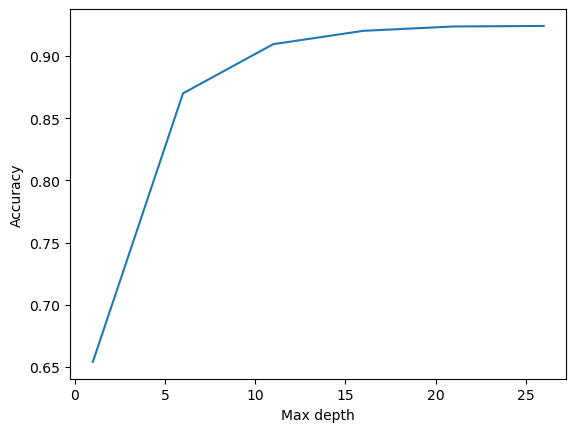

In [20]:
# find best parameters for random forest classifier
scores = []

for i in range(1, 31, 5):
    model = RandomForestClassifier(n_estimators=100, max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.plot(range(1,31,5), scores)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

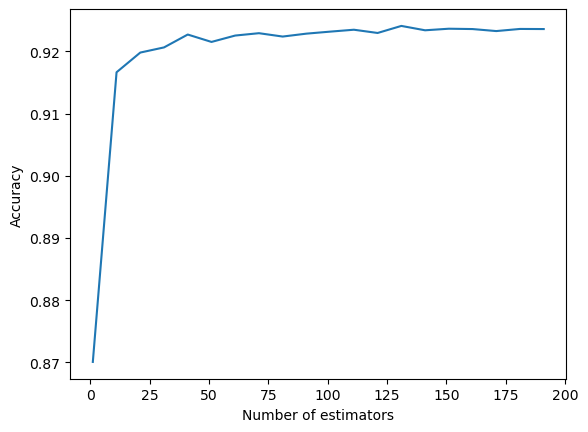

In [22]:
# around 20 is the best max depth to use

# test # of estimators
scores = []

for i in range(1, 201, 10):
    model = RandomForestClassifier(n_estimators=i, max_depth=20)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.plot(range(1,201,10), scores)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

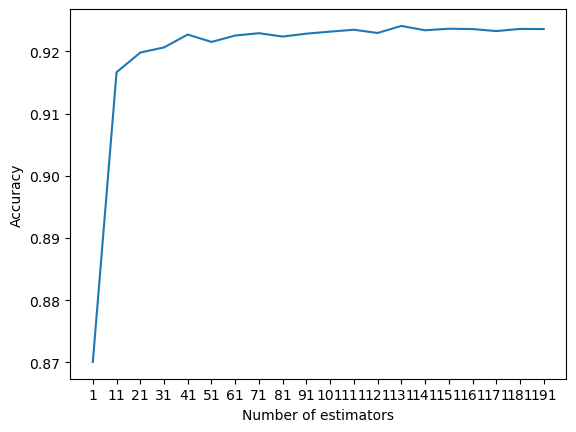

In [24]:
# label each score with the number of estimators
plt.plot(range(1,201,10), scores)
plt.xticks(range(1,201,10))
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=20)
